<a href="https://colab.research.google.com/github/SumantBobade/TensorFlow_Tut/blob/main/Load_CSV_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [5]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

Next make a regression model predict the age. Since there is only a single input tensor, a tf.keras.Sequential model is sufficient here.

In [6]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [7]:
abalone_model.compile(optimizer= tf.keras.optimizers.Adam(),
                      loss= tf.keras.losses.MeanSquaredError())

In [9]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 97.6186 
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33.5436
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5077
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0089
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0044
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3323
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1590
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7867
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2628
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5921


In [10]:
abalone_labels

,Age
0,7
1,6
2,14
3,16
4,13
...,...
3315,15
3316,10
3317,11
3318,16


You have just seen the most basic way to train a model using CSV data. Next, you will learn how to apply preprocessing to normalize numeric columns.

#Basic preprocessing
It's good practice to normalize the inputs to your model. The Keras preprocessing layers provide a convenient way to build this normalization into your model.

The tf.keras.layers.Normalization layer precomputes the mean and variance of each column, and uses these to normalize the data.

First, create the layer:

In [11]:
normalize =layers.Normalization()

In [12]:
normalize.adapt(abalone_features)

In [15]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

norm_abalone_model.compile(optimizer=tf.keras.optimizers.Adam(),
                           loss = tf.keras.losses.MeanSquaredError())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 88.1462
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39.3329
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.7509
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4654
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8979
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9683
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3760
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8150
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6301
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4432


#Mixed data types
In the previous sections, you worked with a dataset where all the features were limited-range floating point values. But not all datasets are limited to a single data type.

The "Titanic" dataset contains information about the passengers on the Titanic. The nominal task on this dataset is to predict who survived.



The raw data can easily be loaded as a Pandas DataFrame, but is not immediately usable as input to a TensorFlow model.

In [16]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [17]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

Because of the different data types and ranges, you can't simply stack the features into a NumPy array and pass it to a tf.keras.Sequential model. Each column needs to be handled individually.

As one option, you could preprocess your data offline (using any tool you like) to convert categorical columns to numeric columns, then pass the processed output to your TensorFlow model. The disadvantage to that approach is that if you save and export your model the preprocessing is not saved with it. The Keras preprocessing layers avoid this problem because they're part of the model.

In this example, you'll build a model that implements the preprocessing logic using Keras functional API. You could also do it by subclassing.

The functional API operates on "symbolic" tensors. Normal "eager" tensors have a value. In contrast these "symbolic" tensors do not. Instead they keep track of which operations are run on them, and build a representation of the calculation, that you can run later. Here's a quick example:

In [18]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input +1

#the result dosen't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_9>

In [19]:
calc =tf.keras.Model(inputs=input, outputs = result)

In [20]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


To build the preprocessing model, start by building a set of symbolic tf.keras.Input objects, matching the names and data-types of the CSV columns.

In [22]:
inputs= {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype =tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>}

In [23]:
numeric_inputs = {name:input for name, input in inputs.items()
                  if input.dtype==tf.float32}

x= layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_11>

In [24]:
preprocessed_inputs = [all_numeric_inputs]

For the string inputs use the tf.keras.layers.StringLookup function to map from strings to integer indices in a vocabulary. Next, use tf.keras.layers.CategoryEncoding to convert the indexes into float32 data appropriate for the model.

The default settings for the tf.keras.layers.CategoryEncoding layer create a one-hot vector for each input. A tf.keras.layers.Embedding would also work. Check out the Working with preprocessing layers guide and the Classify structured data using Keras preprocessing layers tutorial for more on this topic.

In [25]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

With the collection of inputs and preprocessed_inputs, you can concatenate all the preprocessed inputs together, and build a model that handles the preprocessing:

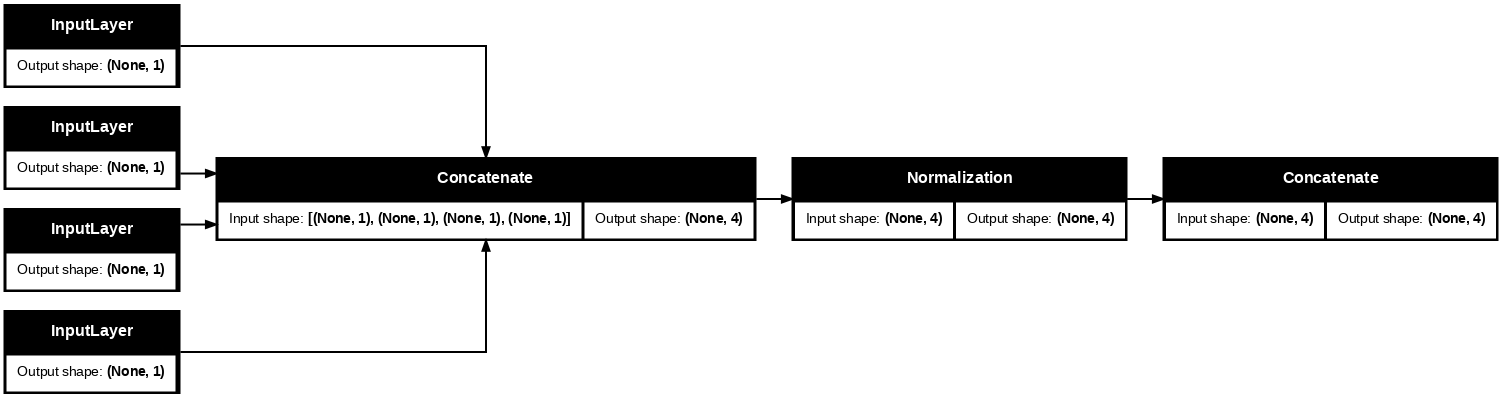

In [27]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

This model just contains the input preprocessing. You can run it to see what it does to your data. Keras models don't automatically convert pandas DataFrames because it's not clear if it should be converted to one tensor or to a dictionary of tensors. So, convert it to a dictionary of tensors:

In [28]:
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}

Slice out the first training example and pass it to this preprocessing model, you see the numeric features and string one-hots all concatenated together:

In [30]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

ValueError: Exception encountered when calling Functional.call().

[1mcould not convert string to float: 'n'[0m

Arguments received by Functional.call():
  • inputs={'sex': "array(['male'], dtype=object)", 'age': 'array([22.])', 'n_siblings_spouses': 'array([1])', 'parch': 'array([0])', 'fare': 'array([7.25])', 'class': "array(['Third'], dtype=object)", 'deck': "array(['unknown'], dtype=object)", 'embark_town': "array(['Southampton'], dtype=object)", 'alone': "array(['n'], dtype=object)"}
  • training=None
  • mask=None

In [31]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [32]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node functional_5_1/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-32-35c0ffc4f5fd>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 167, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 258, in _standardize_inputs

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 218, in _convert_inputs_to_tensors

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 822, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node functional_5_1/Cast}}]] [Op:__inference_one_step_on_iterator_5936]